In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

In [41]:
df = pd.read_csv("smoking.csv")

In [42]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [43]:
df["gender"]=df["gender"].replace({"Female":"woman","Male":"man"})
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,man,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,woman,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,man,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,woman,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,woman,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [44]:
df.dtypes

gender                    object
age                        int64
marital_status            object
highest_qualification     object
nationality               object
ethnicity                 object
gross_income              object
region                    object
smoke                     object
amt_weekends             float64
amt_weekdays             float64
type                      object
dtype: object

In [45]:
df.isnull().sum()

gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

In [46]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum()

gender                   0
age                      0
marital_status           0
highest_qualification    0
nationality              0
ethnicity                0
gross_income             0
region                   0
smoke                    0
amt_weekends             0
amt_weekdays             0
type                     0
dtype: int64

In [48]:
df.columns

Index(['gender', 'age', 'marital_status', 'highest_qualification',
       'nationality', 'ethnicity', 'gross_income', 'region', 'smoke',
       'amt_weekends', 'amt_weekdays', 'type'],
      dtype='object')

In [49]:
df.describe()

,age,amt_weekends,amt_weekdays
count,421.000000,421.000000,421.000000
mean,42.714964,16.410926,13.750594
std,16.179631,9.892988,9.388292
min,16.000000,0.000000,0.000000
25%,30.000000,10.000000,7.000000
50%,40.000000,15.000000,12.000000
75%,54.000000,20.000000,20.000000
max,93.000000,60.000000,55.000000


In [50]:
df.sample(3)

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
452,woman,53,Married,Degree,British,White,"5,200 to 10,400",Midlands & East Anglia,Yes,15.0,15.0,Both/Mainly Hand-Rolled
76,woman,31,Separated,GCSE/O Level,British,White,"15,600 to 20,800",The North,Yes,20.0,20.0,Packets
1180,woman,48,Divorced,No Qualification,English,White,"15,600 to 20,800",South East,Yes,5.0,5.0,Hand-Rolled


In [51]:
df["nationality"].nunique()

8

In [52]:
df["nationality"].unique()

array(['British', 'English', 'Welsh', 'Irish', 'Scottish', 'Other',
       'Unknown', 'Refused'], dtype=object)

In [53]:
df["ethnicity"].nunique()

7

In [54]:
df["ethnicity"].unique()

array(['White', 'Mixed', 'Asian', 'Chinese', 'Refused', 'Black',
       'Unknown'], dtype=object)

In [55]:
df["marital_status"].nunique()

5

In [56]:
df["marital_status"].unique()

array(['Single', 'Married', 'Divorced', 'Widowed', 'Separated'],
      dtype=object)

In [57]:
df["gross_income"].unique()

array(['Under 2,600', 'Above 36,400', '2,600 to 5,200', '5,200 to 10,400',
       'Refused', '15,600 to 20,800', '20,800 to 28,600',
       '10,400 to 15,600', '28,600 to 36,400', 'Unknown'], dtype=object)

In [58]:
def income(cell):
    d={
        '2,600 to 5,200':3500,
        'Under 2,600':2500,
        '28,600 to 36,400':32000,
        '5,200 to 10,400':8000,
        'Refused':None,
        '20,800 to 28,600':25000,
        'Unknown':None
        
    }
    return d.get(cell)
df["income"]=df["gross_income"].apply(income)

In [59]:
df.sample(3)

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,income
1133,man,32,Single,GCSE/CSE,English,White,"10,400 to 15,600",South East,Yes,20.0,20.0,Packets,NaN
1293,woman,26,Single,GCSE/O Level,British,White,"5,200 to 10,400",South East,Yes,15.0,15.0,Both/Mainly Packets,8000.0
656,woman,54,Divorced,GCSE/O Level,Unknown,Chinese,"2,600 to 5,200",Midlands & East Anglia,Yes,20.0,20.0,Both/Mainly Packets,3500.0


In [60]:
df["type"].nunique()

4

In [61]:
df["type"].unique()

array(['Packets', 'Hand-Rolled', 'Both/Mainly Packets',
       'Both/Mainly Hand-Rolled'], dtype=object)

In [77]:
smokestatus = df.groupby(["gender","type"]).size().unstack(fill_value=0)
smokestatus = smokestatus.reset_index()

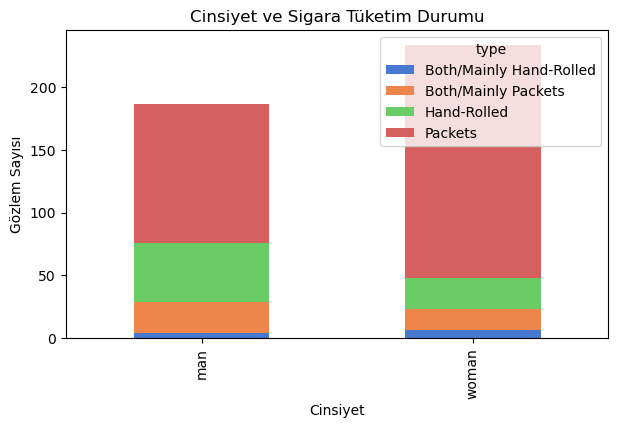

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn'dan renk paleti seçimi
colors = sns.color_palette('muted')

# smokestatus DataFrame'i kullanarak çubuk grafik çizin
smokestatus.plot(kind='bar', x='gender', stacked=True, figsize=(7, 4), color=colors)

# Grafik başlığı ve eksen etiketlerini ayarlayın
plt.title('Cinsiyet ve Sigara Tüketim Durumu')
plt.xlabel('Cinsiyet')
plt.ylabel('Gözlem Sayısı')

# Grafikleri gösterin
plt.show()

In [99]:
male_subset = df[df['gender'] == 'man']
male_packet_smokers = male_subset[(male_subset['type'] == 'Packets') & (male_subset['smoke'] == 'Yes')].shape[0]
male_packet_smokers

111

In [100]:
female_subset = df[df["gender"]== "woman"]
female_subset_smokers = female_subset[(female_subset["type"]=="Packets") & (female_subset["smoke"]== "Yes")].shape[0]
female_subset_smokers

186

In [88]:
df["gender"].value_counts()

gender
woman    234
man      187
Name: count, dtype: int64

In [62]:
df.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,income
1,woman,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets,2500.0
6,man,53,Married,Degree,British,White,"Above 36,400",The North,Yes,6.0,6.0,Packets,NaN
8,man,40,Single,GCSE/CSE,English,White,"2,600 to 5,200",The North,Yes,8.0,8.0,Hand-Rolled,3500.0
9,woman,41,Married,No Qualification,English,White,"5,200 to 10,400",The North,Yes,15.0,12.0,Packets,8000.0
20,woman,34,Married,GCSE/CSE,British,White,"2,600 to 5,200",The North,Yes,6.0,12.0,Packets,3500.0


In [63]:
df["age"].value_counts().sort_index(ascending=False)

age
93    1
86    1
85    1
82    1
79    1
     ..
20    4
19    2
18    8
17    4
16    4
Name: count, Length: 66, dtype: int64

In [68]:
smoking_status = df.groupby(['marital_status', 'smoke']).size().unstack(fill_value=0)
smoking_status = smoking_status.reset_index()

# Öncelikle, gruplanmış verilerde 'marital_status' sütunu indeks olarak kullanılır ve
# 'smoke' sütunu sütunlar olarak kullanılır. Bu durumda, 'smoke' sütununda 'Yes' ve 'No' değerleri bulunur.
# unstack() yöntemi, 'smoke' sütununu sütunlara çıkarır ve 'Yes' ve 'No' değerlerini sütun adları olarak kullanır.

# fill_value=0 argümanı, eğer bir kombinasyonda gözlem bulunmuyorsa, bu değeri 0 olarak doldurur. 
# Bu, veri setinde eksik değerler oluşmasını engeller.

# Son olarak, reset_index() yöntemi, indeksi sıfırlayarak gruplanmış veriyi yeniden düzenler.
# Bu işlem, indeksin sütun haline getirilmesini ve gruplanmış verinin daha düzgün bir formatta olmasını sağlar.

In [69]:
df["smoke"].unique()

array(['Yes'], dtype=object)

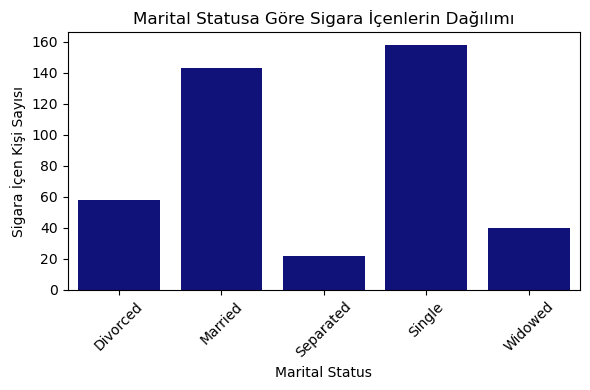

In [74]:
plt.figure(figsize=(6, 4))
sns.barplot(x='marital_status', y='Yes', data=smoking_status, color='darkblue')
plt.title('Marital Statusa Göre Sigara İçenlerin Dağılımı')
plt.xlabel('Marital Status')
plt.ylabel('Sigara İçen Kişi Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
df["marital_status"].value_counts()

marital_status
Single       158
Married      143
Divorced      58
Widowed       40
Separated     22
Name: count, dtype: int64

In [76]:
df["region"].unique()

array(['The North', 'Midlands & East Anglia', 'London', 'South East',
       'South West', 'Wales', 'Scotland'], dtype=object)